# Trabalho Final da disciplina de **LUI**


**Trabalho desenvolvido por Matheus Barbosa Gevaerd**

#Resumo

Resolvi desenvolver o trabalho final da disciplina com a extração de dados de um arquivo pdf alocado no seguinte endereço: http://www.riocomsaude.rj.gov.br/site/Conteudo/Dados.aspx

O arquivo em questão é o "Levantamento de Índice Rápido para Aedes aegypti - LIRAa" de janeiro de 2024. Em cada município, agentes de saúde visitam residências e outros tipos de imóveis, para inspecionar e identificar os criadouros, e ao encontrar, coletar as larvas ou pupas para análise em laboratório, de acordo com as Diretrizes Nacionais para Prevenção e Controle de Epidemias de Dengue. Os imóveis são classificados quanto ao nível da infestação: Menor que 1%: SATISFATÓRIO | De 1% e 3,99%: EM ALERTA | Acima de 3,99%: EM RISCO.

Um dado em especial me chamou a atenção e gostaria de apresentá-lo em um dataframe ordenado por "estratos em risco", demonstrando qual município da região metropolitana estava com residências em pior situação em janeiro de 2024.

Como os dados já estavam apresentados em várias tabelas, optei por usar o **tabula** para melhor extração.

#Extração

In [92]:
!pip install tabula-py

In [93]:
import tabula

In [94]:
df_pdf = tabula.read_pdf("http://www.riocomsaude.rj.gov.br/Publico/MostrarArquivo.aspx?C=YEHr1vWel%2fA%3d", output_format="dataframe", pages=[7,8])

*Obs*: Poderia baixar o arquivo .pdf do site e realizar a extração diretamente do drive. Resolvi extrair direto do site para testar formas mais rápidas de extração

In [95]:
df_pdf[0]

,Município,No de estratos,Satisfatórios,Em alerta,Em risco
0,Duque de Caxias,61,22,35,04
1,Japeri,07,01,04,02
2,Nova Iguaçu,53,17,33,03
3,Rio de Janeiro,253,173,77,03
4,Seropédica,09,0,07,02
5,Município,No de estratos,Satisfatórios,Em alerta,Em risco
6,Maricá,21,19,01,01
7,Rio Bonito,05,0,03,02
8,São Gonçalo,52,34,17,01
9,Tanguá,04,01,01,02


Após extração, os dados principais já foram corretamente alocados no dataframe. No entanto, os cabeçalhos vieram repetidos e não há informação sobre as regiões administrativas dos municípios (dado necessário para o objetivo apresentado no resumo)

#Tratamento

In [96]:
type(df_pdf), type(df_pdf[0]),len(df_pdf)

(list, pandas.core.frame.DataFrame, 1)

In [97]:
#Retirando os cabeçalhos das colunas de todas as tabelas para criação de um único dataframe dos municípios

for i, df in enumerate(df_pdf):
    mask = df.apply(lambda row: row.str.startswith('Município'), axis=1).any(axis=1)
    df_pdf[i] = df[~mask]

In [98]:
df_pdf[0]

,Município,No de estratos,Satisfatórios,Em alerta,Em risco
0,Duque de Caxias,61,22,35,04
1,Japeri,07,01,04,02
2,Nova Iguaçu,53,17,33,03
3,Rio de Janeiro,253,173,77,03
4,Seropédica,09,0,07,02
6,Maricá,21,19,01,01
7,Rio Bonito,05,0,03,02
8,São Gonçalo,52,34,17,01
9,Tanguá,04,01,01,02
11,Angra dos Reis,14,01,08,05


In [99]:
# Dicionário que mapeia os municípios por suas respectivas regiões
regioes = {
    "Duque de Caxias": "Metropolitana 1",
    "Japeri": "Metropolitana 1",
    "Nova Iguaçu": "Metropolitana 1",
    "Rio de Janeiro": "Metropolitana 1",
    "Seropédica": "Metropolitana 1",
    "Maricá": "Metropolitana 2",
    "Rio Bonito": "Metropolitana 2",
    "São Gonçalo": "Metropolitana 2",
    "Tanguá": "Metropolitana 2",
    "Angra dos Reis": "Baía da Ilha Grande",
    "Araruama": "Baixada Litorânea",
    "Rio das Ostras": "Baixada Litorânea",
    "Mendes": "Centro Sul",
    "Três Rios": "Centro Sul",
    "Barra do Piraí": "Médio Paraíba",
    "Itatiaia": "Médio Paraíba",
    "Piraí": "Médio Paraíba",
    "Valença": "Médio Paraíba",
    "Volta Redonda": "Médio Paraíba",
    "Itaocara": "Noroeste",
    "Itaperuna": "Noroeste",
    "Natividade": "Noroeste",
    "Porciúncula": "Noroeste",
    "Santo Antônio de Pádua": "Noroeste",
    "Campos dos Goytacazes": "Norte",
    "Carmo": "Serrana",
    "Nova Friburgo": "Serrana",
}

def obter_regiao(Município):
    return regioes.get(Município, "Outra")
for i, df in enumerate(df_pdf):
    df_pdf[i]["Região"] = df_pdf[i]["Município"].apply(obter_regiao)

<ipython-input-99-3270e666934a>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pdf[i]["Região"] = df_pdf[i]["Município"].apply(obter_regiao)


In [100]:
df_pdf[0]

,Município,No de estratos,Satisfatórios,Em alerta,Em risco,Região
0,Duque de Caxias,61,22,35,04,Metropolitana 1
1,Japeri,07,01,04,02,Metropolitana 1
2,Nova Iguaçu,53,17,33,03,Metropolitana 1
3,Rio de Janeiro,253,173,77,03,Metropolitana 1
4,Seropédica,09,0,07,02,Metropolitana 1
6,Maricá,21,19,01,01,Metropolitana 2
7,Rio Bonito,05,0,03,02,Metropolitana 2
8,São Gonçalo,52,34,17,01,Metropolitana 2
9,Tanguá,04,01,01,02,Metropolitana 2
11,Angra dos Reis,14,01,08,05,Baía da Ilha Grande


Problema: as regiões ficaram na última coluna do dataframe. Gostaria que ficassem na primeira.

In [101]:
for i, df in enumerate(df_pdf):
    regiao_temporaria = df_pdf[i].pop("Região")
    df_pdf[i].insert(0, "Região", regiao_temporaria)

In [102]:
df_pdf[0]

,Região,Município,No de estratos,Satisfatórios,Em alerta,Em risco
0,Metropolitana 1,Duque de Caxias,61,22,35,04
1,Metropolitana 1,Japeri,07,01,04,02
2,Metropolitana 1,Nova Iguaçu,53,17,33,03
3,Metropolitana 1,Rio de Janeiro,253,173,77,03
4,Metropolitana 1,Seropédica,09,0,07,02
6,Metropolitana 2,Maricá,21,19,01,01
7,Metropolitana 2,Rio Bonito,05,0,03,02
8,Metropolitana 2,São Gonçalo,52,34,17,01
9,Metropolitana 2,Tanguá,04,01,01,02
11,Baía da Ilha Grande,Angra dos Reis,14,01,08,05


#Ordenar pelos municípios com mais imóveis em situação de risco para dengue

In [103]:
df.sort_values(by="Em risco", ascending=False, inplace=True)

<ipython-input-103-b68172e4d537>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by="Em risco", ascending=False, inplace=True)


In [104]:
df_pdf[0]

,Região,Município,No de estratos,Satisfatórios,Em alerta,Em risco
31,Norte,Campos dos Goytacazes,19,03,07,09
11,Baía da Ilha Grande,Angra dos Reis,14,01,08,05
0,Metropolitana 1,Duque de Caxias,61,22,35,04
34,Serrana,Nova Friburgo,10,02,04,04
33,Serrana,Carmo,03,0,0,03
2,Metropolitana 1,Nova Iguaçu,53,17,33,03
3,Metropolitana 1,Rio de Janeiro,253,173,77,03
4,Metropolitana 1,Seropédica,09,0,07,02
1,Metropolitana 1,Japeri,07,01,04,02
28,Noroeste,Porciúncula,02,0,0,02


#Filtrar somente os municípios da região metropolitana (Metropolitana 1 e Metropolitana 2)

In [105]:
import pandas as pd

df_filtrados = []
regioes_metropolitanas = ["Metropolitana 1", "Metropolitana 2"]
for df in df_pdf:
    mask = df["Região"].isin(regioes_metropolitanas)
    df_filtrados.append(df[mask])

df_final = pd.concat(df_filtrados)

In [106]:
df_final

,Região,Município,No de estratos,Satisfatórios,Em alerta,Em risco
0,Metropolitana 1,Duque de Caxias,61,22,35,04
2,Metropolitana 1,Nova Iguaçu,53,17,33,03
3,Metropolitana 1,Rio de Janeiro,253,173,77,03
4,Metropolitana 1,Seropédica,09,0,07,02
1,Metropolitana 1,Japeri,07,01,04,02
9,Metropolitana 2,Tanguá,04,01,01,02
7,Metropolitana 2,Rio Bonito,05,0,03,02
6,Metropolitana 2,Maricá,21,19,01,01
8,Metropolitana 2,São Gonçalo,52,34,17,01


#Gráficos

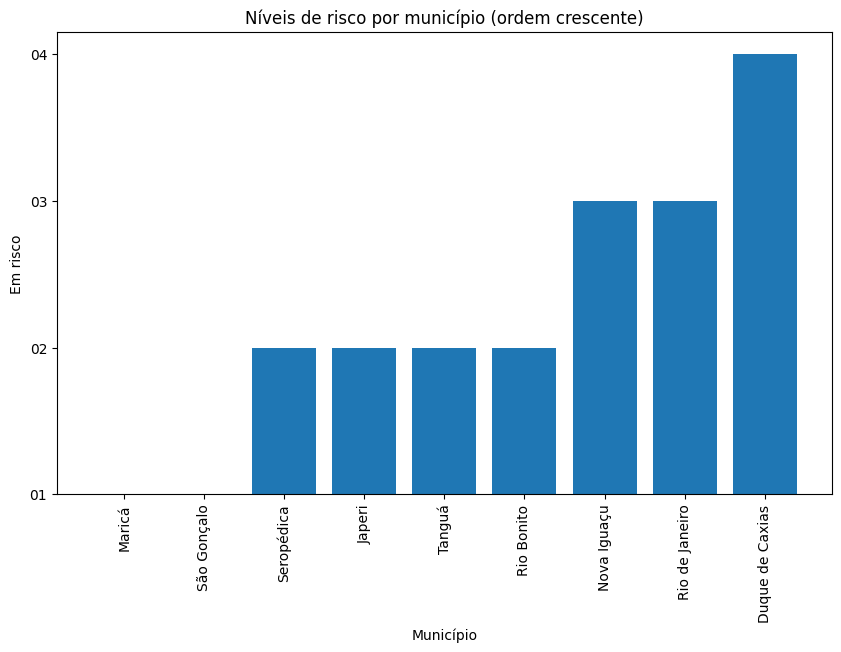

In [107]:
import matplotlib.pyplot as plt

df_final_ordenado = df_final.sort_values(by="Em risco")
plt.figure(figsize=(10,6))
plt.bar(df_final_ordenado["Município"], df_final_ordenado["Em risco"])
plt.xlabel('Município')
plt.ylabel('Em risco')
plt.title('Níveis de risco por município (ordem crescente)')
plt.xticks(rotation=90)
plt.show()

**Obs: temos os valores absolutos, mas isso é relevante sem considerar o número de estratos do município?**

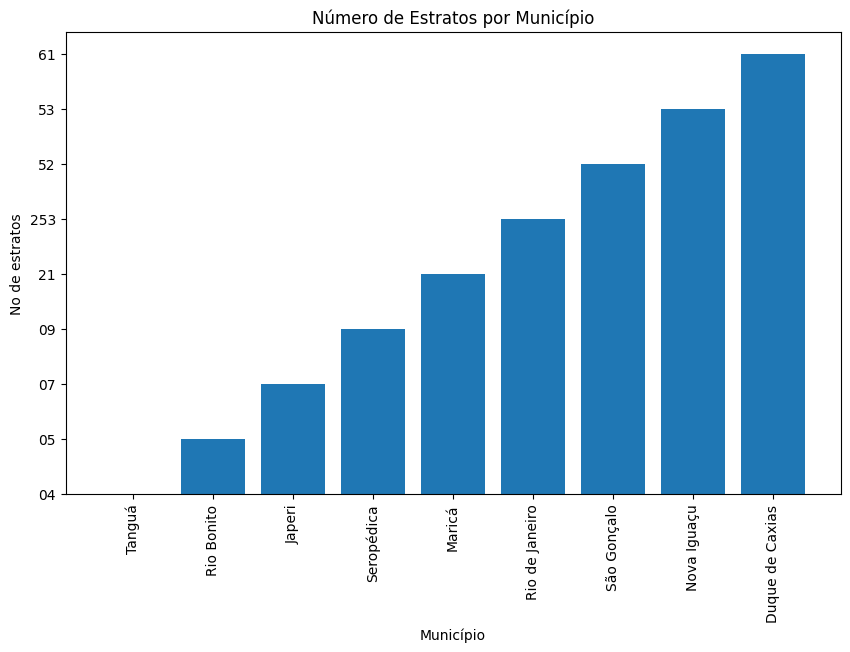

In [108]:
#Gráfico para visualização de estratos por município
df_final_ordenado_por_estratos = df_final.sort_values(by="No de estratos", ascending=True)

plt.figure(figsize=(10,6))
plt.bar(df_final_ordenado_por_estratos["Município"], df_final_ordenado_por_estratos["No de estratos"])
plt.xlabel('Município')
plt.ylabel('No de estratos')
plt.title('Número de Estratos por Município')
plt.xticks(rotation=90)
plt.show()

**Problema: os dados não estão configurados como números. Precisamos alterar para que o município do Rio de Janeiro seja o de maior representação gráfica.**

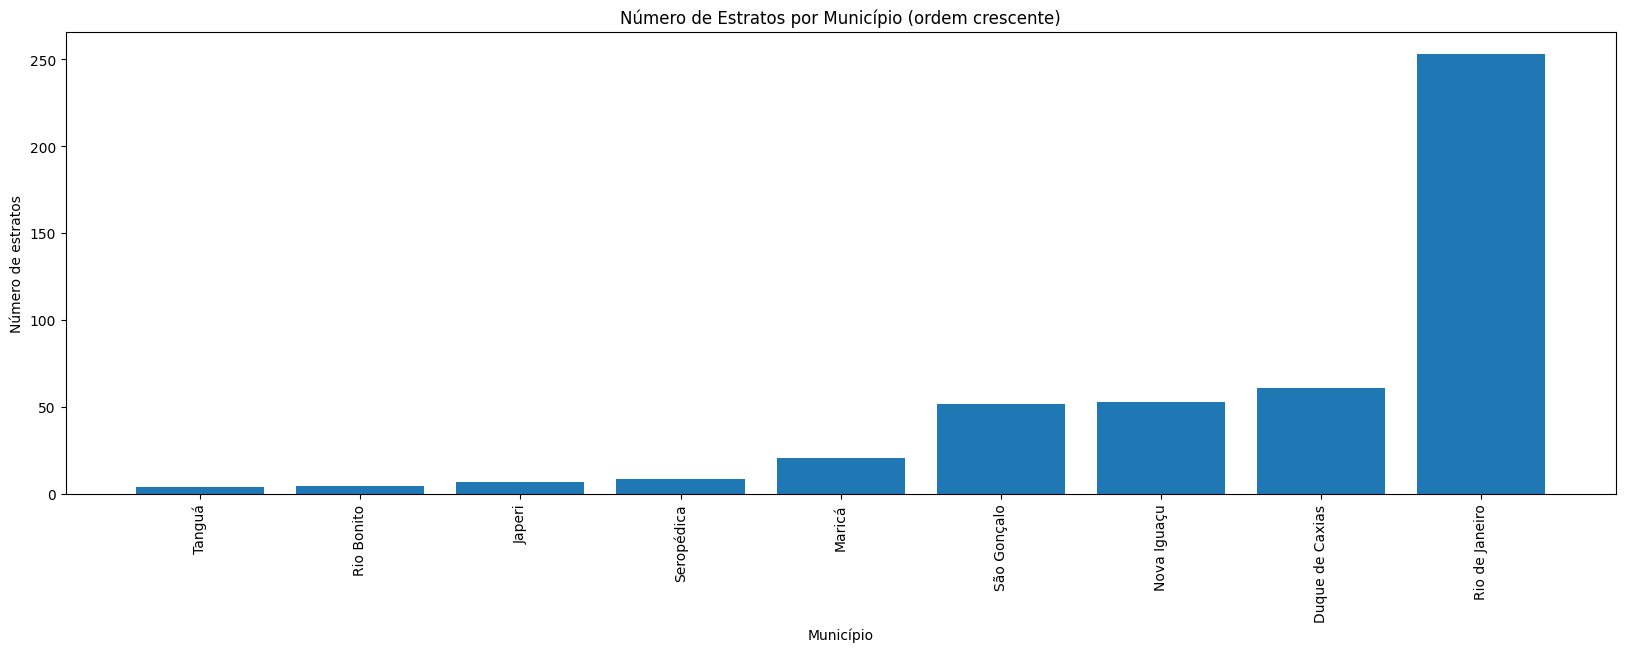

In [109]:
df_final["No de estratos"] = pd.to_numeric(df_final["No de estratos"], errors="coerce")

df_final_ordenado_por_estratos = df_final.sort_values(by="No de estratos", ascending=True)

plt.figure(figsize=(20,6))
plt.bar(df_final_ordenado_por_estratos["Município"], df_final_ordenado_por_estratos["No de estratos"])
plt.xlabel('Município')
plt.ylabel('Número de estratos')
plt.title('Número de Estratos por Município (ordem crescente)')
plt.xticks(rotation=90)
plt.show()

#Pivotamento

In [110]:
# Pivoteamento das colunas "Em risco" para linhas, onde os municípios se tornam as novas linhas
df_final_pivot = df_final.pivot_table(index=["Em risco"], columns=["Município"], aggfunc='size', fill_value=0)

print(df_final_pivot)

Município  Duque de Caxias  Japeri  Maricá  Nova Iguaçu  Rio Bonito  \
Em risco                                                              
01                       0       0       1            0           0   
02                       0       1       0            0           1   
03                       0       0       0            1           0   
04                       1       0       0            0           0   

Município  Rio de Janeiro  Seropédica  São Gonçalo  Tanguá  
Em risco                                                    
01                      0           0            1       0  
02                      0           1            0       1  
03                      1           0            0       0  
04                      0           0            0       0  


# Extra

Após o exercício notei a necessidade de avaliar a relevância dos estratos em risco em relação ao número total de estratos.

Dessa forma, criei uma nova coluna com o percentual de estratos em risco em comparação ao número total de estratos e apresentei graficamente para posterior análise em conjunto com os dados absolutos.

In [111]:
df_final['No de estratos'] = pd.to_numeric(df_final['No de estratos'], errors='coerce')
df_final['Em risco'] = pd.to_numeric(df_final['Em risco'], errors='coerce')
df_final['% em risco'] = (df_final['Em risco'] / df_final['No de estratos']) * 100

print(df_final)

            Região        Município  No de estratos Satisfatórios Em alerta  \
0  Metropolitana 1  Duque de Caxias              61            22        35   
2  Metropolitana 1      Nova Iguaçu              53            17        33   
3  Metropolitana 1   Rio de Janeiro             253           173        77   
4  Metropolitana 1       Seropédica               9             0        07   
1  Metropolitana 1           Japeri               7            01        04   
9  Metropolitana 2           Tanguá               4            01        01   
7  Metropolitana 2       Rio Bonito               5             0        03   
6  Metropolitana 2           Maricá              21            19        01   
8  Metropolitana 2      São Gonçalo              52            34        17   

   Em risco  % em risco  
0         4    6.557377  
2         3    5.660377  
3         3    1.185771  
4         2   22.222222  
1         2   28.571429  
9         2   50.000000  
7         2   40.000000  
6

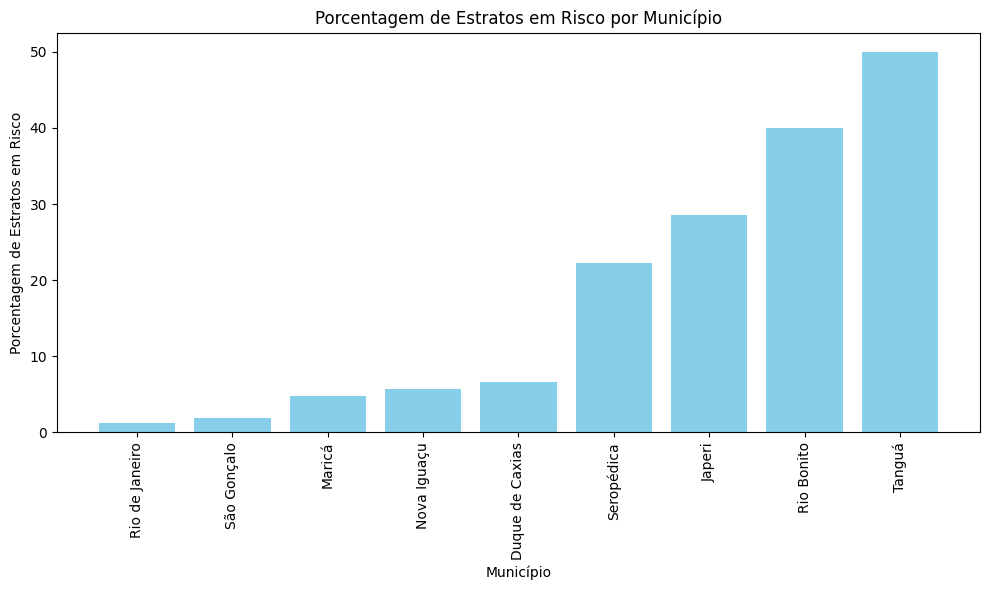

In [112]:
df_final_ordenado = df_final.sort_values(by='% em risco')

plt.figure(figsize=(10, 6))
plt.bar(df_final_ordenado['Município'], df_final_ordenado['% em risco'], color='skyblue')
plt.xlabel('Município')
plt.ylabel('Porcentagem de Estratos em Risco')
plt.title('Porcentagem de Estratos em Risco por Município')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Nota-se uma diferença significativa na comparação entre os valores absolutos e relativos.

Isso denota uma necessidade de melhor investigação em municípios como Tanguá e Rio Bonito, que não possuem tantos imóveis em risco nos valores absolutos, mas que de maneira relativa possuem resultados preocupantes e que não podem ser melhor explorados, tendo em vista números reduzidos de estratos.